In [13]:
import pandas as pd
import analysis_utils as au
import matplotlib.pyplot as plt
import numpy as np

In [14]:
df_exp = pd.read_csv('experimental_data/geballe_heat_data.csv')

In [15]:
for x in np.linspace(3.8-0.5, 3.8+0.5, 11):
    print(x)

3.3
3.4
3.5
3.5999999999999996
3.6999999999999997
3.8
3.9
4.0
4.1
4.2
4.3


/tmp/ipykernel_148282/2670682228.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')       # or 'plasma', 'tab10', etc.


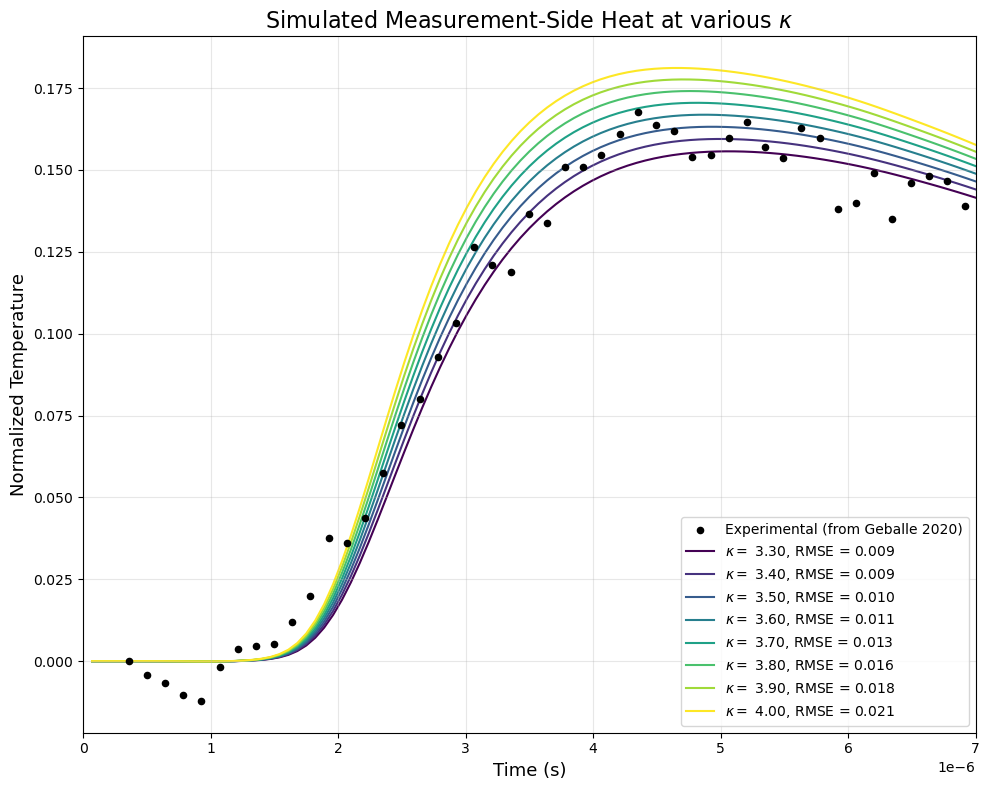

In [17]:
import matplotlib.cm as cm  
from cycler import cycler

# Choose a colormap and sample N colors from it
cmap = cm.get_cmap('viridis')       # or 'plasma', 'tab10', etc.
N = 8                               # number of lines / distinct colors
colors = [cmap(i / (N - 1)) for i in range(N)]

# Set the color cycle
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)

df_rmse = pd.read_csv('outputs/sweep_test/rmse_summary.csv')

# Normalize experimental data
exp_pside_normed = (df_exp['temp'] - df_exp['temp'].iloc[0]) / (df_exp['temp'].max() - df_exp['temp'].min())
exp_time = df_exp['time']

# Downshift experimental oside to start from ic_temp and normalize
ic_temp = 300
oside_initial = df_exp['oside'].iloc[0]
exp_oside_shifted = df_exp['oside'] - oside_initial + ic_temp
exp_oside_normed = (exp_oside_shifted - exp_oside_shifted.iloc[0]) / (df_exp['temp'].max() - df_exp['temp'].min())

fig, ax = plt.subplots(figsize = (10, 8))

# Plot experimental data
#ax.plot(exp_time, exp_pside_normed, color='gray', label='Experimental pulsed side')
ax.scatter(exp_time, exp_oside_normed, color='black', label='Experimental (from Geballe 2020)', s=20, zorder =2)

# plot sim data:    
for k in np.linspace(3.8-0.5, 4.0, 8):
    df_sim = pd.read_csv(f'outputs/sweep_test/{k:.2f}/watcher_points.csv')
    sim_oside_normed = (df_sim['oside'] - df_sim['oside'].iloc[0]) / (df_sim['pside'].max() - df_sim['pside'].min())

    rmse = round(df_rmse.loc[df_rmse['k'] == float(f'{k:.2f}'), 'rmse'].values[0], 4)
    ax.plot(df_sim['time'], sim_oside_normed, 
            zorder = 1,
            label=r'$\kappa=$' + f' {k:.2f}, RMSE = {rmse:.3f}')

ax.grid(True, alpha = 0.3)
ax.legend(loc='lower right')

ax.set_ylabel('Normalized Temperature', fontsize=13)
ax.set_xlabel('Time (s)', fontsize=13)

ax.set_xlim(0, 7e-6)
ax.set_title(r'Simulated Measurement-Side Heat at various $\kappa$', fontsize=16)
plt.tight_layout()
plt.show()

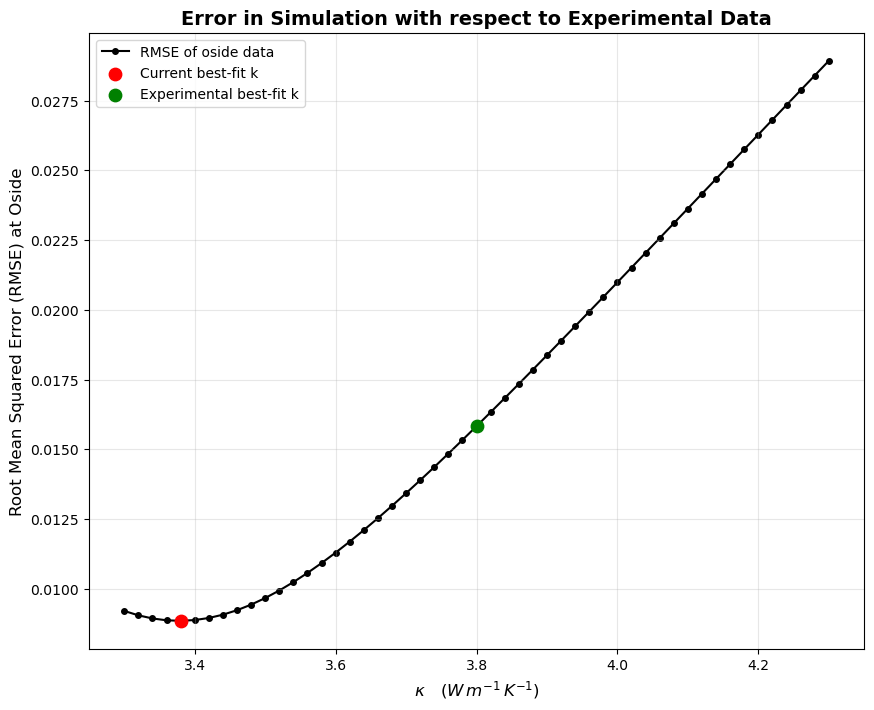

In [ ]:
df_rmse = pd.read_csv('outputs/sweep_test/rmse_summary.csv')
fig, ax = plt.subplots(figsize = (10, 8))
ax.plot(df_rmse['k'], df_rmse['rmse'], color='black', marker='o', markersize=4, zorder = 1, label='RMSE of oside data')
ax.scatter(df_rmse.loc[df_rmse['k'] == 3.38]['k'], df_rmse.loc[df_rmse['k'] == 3.38]['rmse'], color='red', zorder=2, s=80, label='Current best-fit k')
ax.scatter(df_rmse.loc[df_rmse['k'] == 3.8]['k'], df_rmse.loc[df_rmse['k'] == 3.8]['rmse'], color='green', zorder=2, s=80, label='Experimental best-fit k')

ax.grid(True, alpha = 0.3)
ax.legend()
ax.set_ylabel('Root Mean Squared Error (RMSE) at Oside', fontsize=12)
ax.set_xlabel(r'$\kappa\quad(W\,m^{-1}\,K^{-1}$)', fontsize = 12)
ax.set_title('Error in Simulation with respect to Experimental Data', fontsize = 14, fontweight = 'bold')
plt.show()

In [114]:
import pandas as pd

df_key = pd.read_csv("outputs/sweep_test/successful_runs.csv")

fwhm_list = []
k_list = []
width_list = []
min_list = []
max_list = []
min_time_list = []
max_time_list = []

for name in df_key['run_name']:
    df = pd.read_csv(f'outputs/sweep_test/{name}/radial_gradient.csv')
    df_num = df.drop(columns='time').apply(pd.to_numeric, errors='coerce')  # numeric only

    max_grad = df.max().max()
    min_grad = df.min().min()

    min_time = df.loc[df_num.eq(min_grad).any(axis=1), 'time'].iloc[0]  # first row that hits min_grad
    max_time = df.loc[df_num.eq(max_grad).any(axis=1), 'time'].iloc[0]  # first row that hits max_grad

    fwhm = df_key['fwhm'].loc[df_key['run_name']==name].values[0]
    k = df_key['k'].loc[df_key['run_name']==name].values[0]
    width = df_key['width'].loc[df_key['run_name']==name].values[0]

    fwhm_list.append(fwhm)
    width_list.append(width)
    k_list.append(k)

    min_list.append(min_grad)
    max_list.append(max_grad)

    min_time_list.append(min_time)
    max_time_list.append(max_time)


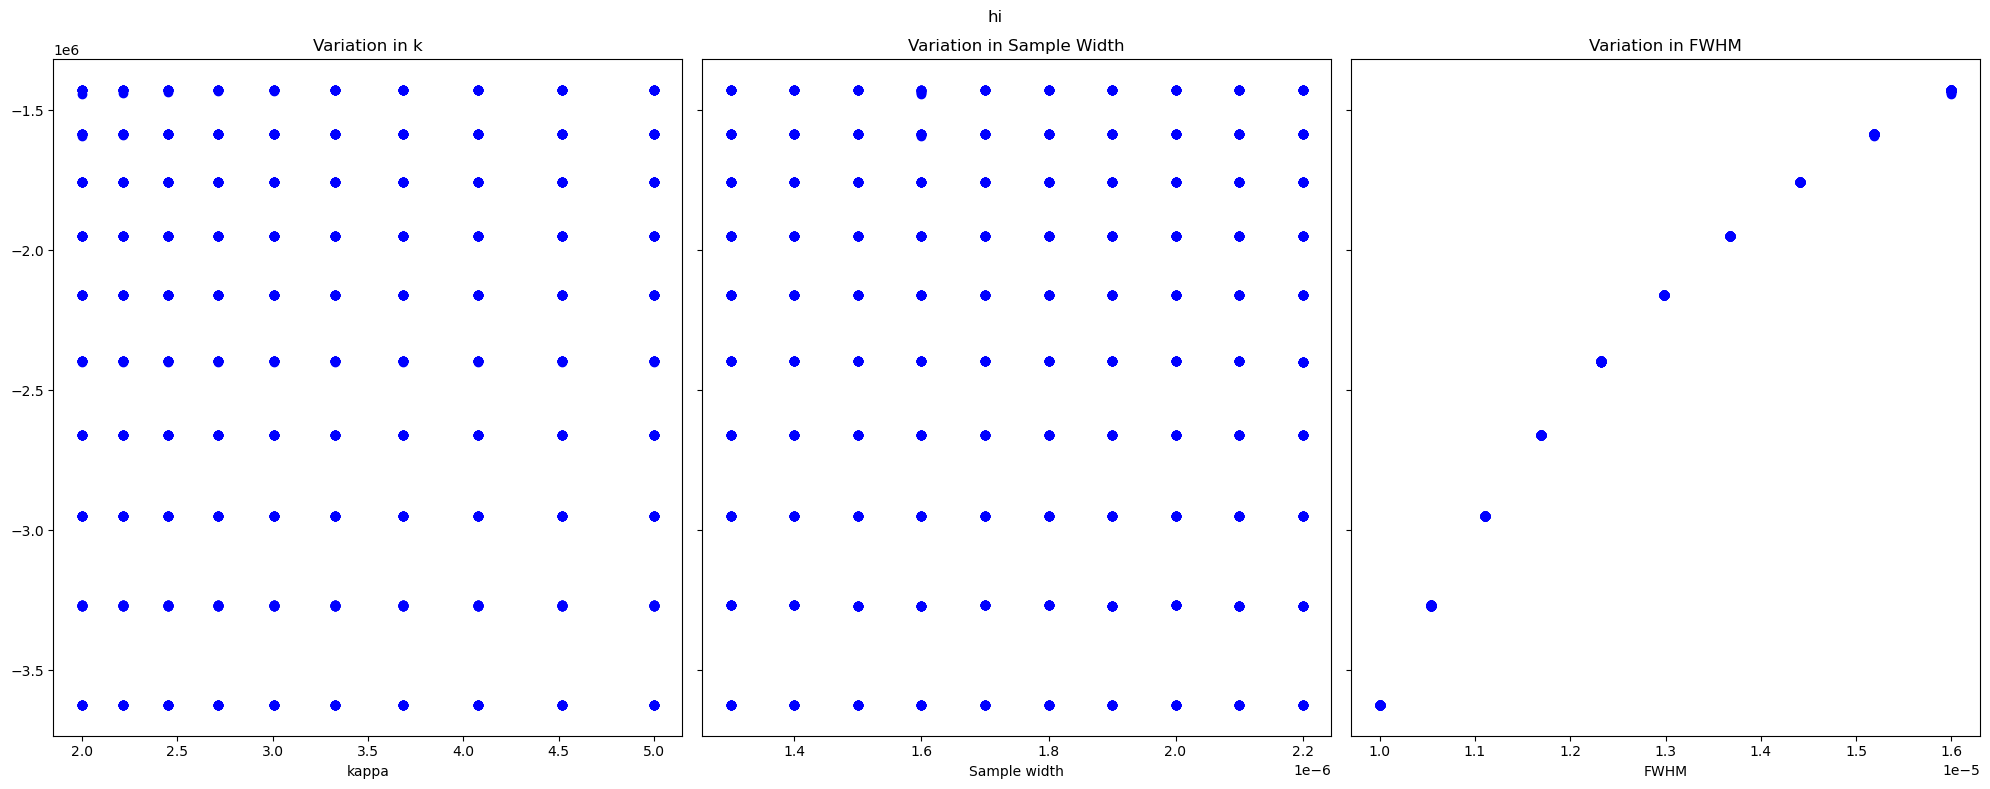

In [ ]:

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize = (20, 8), sharey=True)


axes[0].scatter(k_list, min_list, color='blue')
axes[0].set_title('Variation in k')
axes[0].set_xlabel('kappa')

axes[1].scatter(width_list, min_list, color='blue')
axes[1].set_title('Variation in Sample Width')
axes[1].set_xlabel('Sample width')

axes[2].scatter(fwhm_list, min_list, color='blue')
axes[2].set_title('Variation in FWHM')
axes[2].set_xlabel('FWHM')

plt.tight_layout()
plt.show()

In [117]:
list(set(min_time_list))

[np.float64(1.875e-06), np.float64(2.0625e-06)]

In [118]:
df['time']

0     1.875000e-07
1     3.750000e-07
2     5.625000e-07
3     7.500000e-07
4     9.375000e-07
5     1.125000e-06
6     1.312500e-06
7     1.500000e-06
8     1.687500e-06
9     1.875000e-06
10    2.062500e-06
11    2.250000e-06
12    2.437500e-06
13    2.625000e-06
14    2.812500e-06
15    3.000000e-06
16    3.187500e-06
17    3.375000e-06
18    3.562500e-06
19    3.750000e-06
20    3.937500e-06
21    4.125000e-06
22    4.312500e-06
23    4.500000e-06
24    4.687500e-06
25    4.875000e-06
26    5.062500e-06
27    5.250000e-06
28    5.437500e-06
29    5.625000e-06
30    5.812500e-06
31    6.000000e-06
32    6.187500e-06
33    6.375000e-06
34    6.562500e-06
35    6.750000e-06
36    6.937500e-06
37    7.125000e-06
38    7.312500e-06
39    7.500000e-06
Name: time, dtype: float64

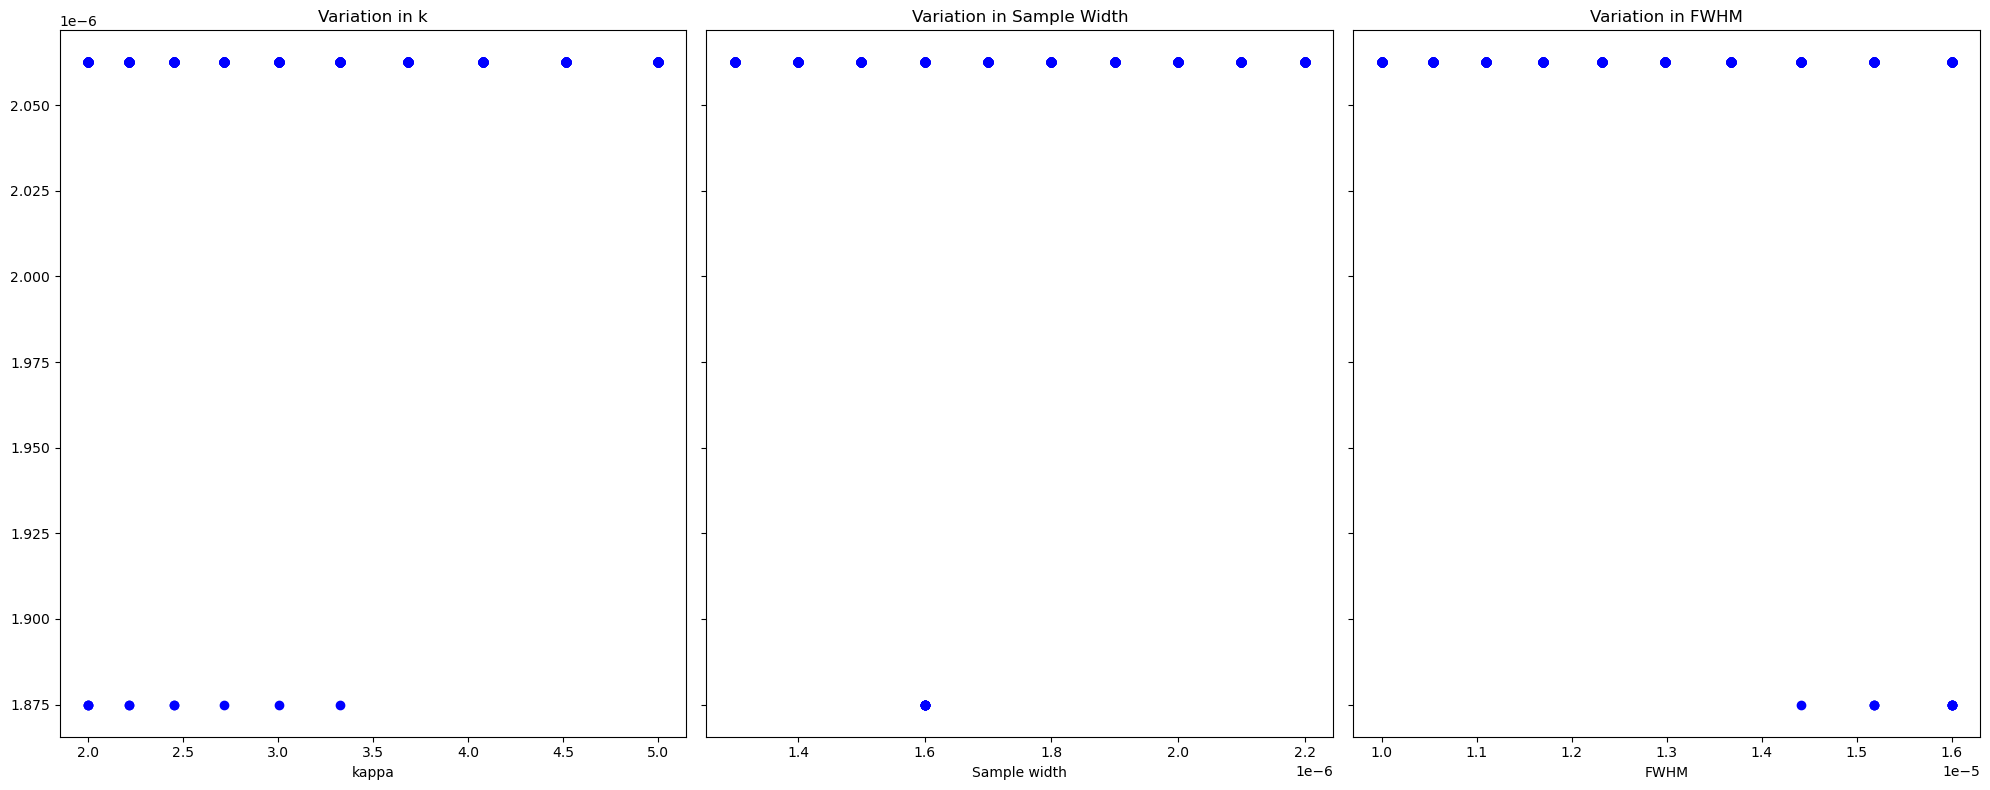

In [116]:

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize = (20, 8), sharey=True)


axes[0].scatter(k_list, min_time_list, color='blue')
axes[0].set_title('Variation in k')
axes[0].set_xlabel('kappa')

axes[1].scatter(width_list, min_time_list, color='blue')
axes[1].set_title('Variation in Sample Width')
axes[1].set_xlabel('Sample width')

axes[2].scatter(fwhm_list, min_time_list, color='blue')
axes[2].set_title('Variation in FWHM')
axes[2].set_xlabel('FWHM')

plt.tight_layout()
plt.show()

In [ ]:
# try a two sided gaussain fit to a representative data slice

import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

df = pd.read_csv('outputs/sweep_test/fwhm_1.30e-5_k_3.68_width_1.90e-6/radial_gradient.csv')
times = df['time']
positions = pd.to_numeric(df.columns.values[1:])

def get_data_at_step(df, step):
    
    time = times[step]
    grad = df[df['time'] == times[step]].values[0][1:]

    return time, grad

time, grad = get_data_at_step(df, 10)    

Fitting timestep 0, time = 1.875e-07
A=-2.802e-06, mu=3.620e-07, sigma_l=1.977e-07, sigma_r=1.159e-06, xb=3.835e-06, m=-5.097e-01, C=8.466e-07


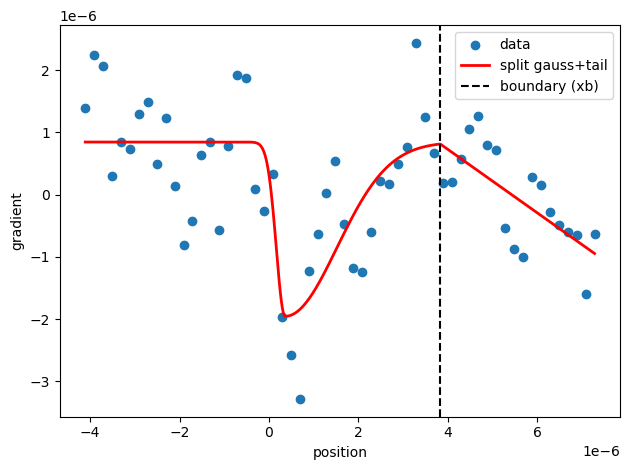

Fitting timestep 1, time = 3.750e-07
A=-1.209e+03, mu=7.288e-06, sigma_l=5.035e-06, sigma_r=2.280e-06, xb=7.288e-06, m=-3.521e+03, C=1.209e+03


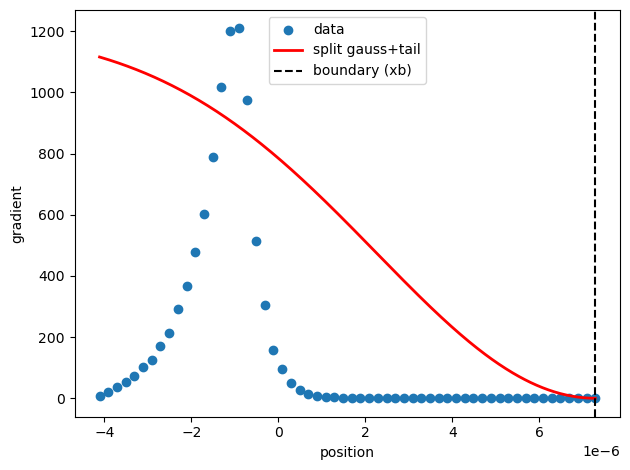

Fitting timestep 2, time = 5.625e-07
A=-9.857e+03, mu=7.288e-06, sigma_l=5.033e-06, sigma_r=2.280e-06, xb=7.288e-06, m=-4.927e+04, C=9.857e+03


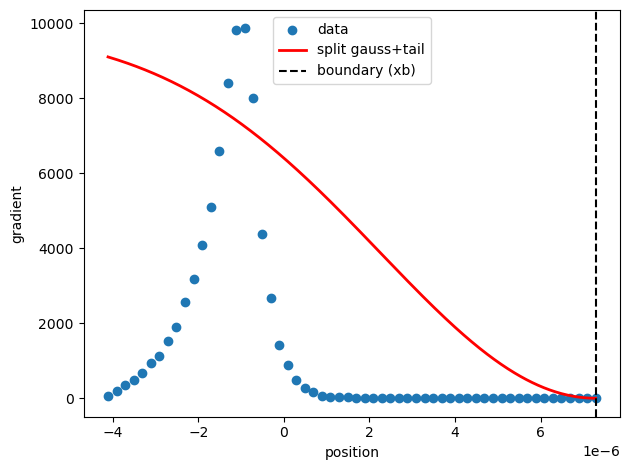

Fitting timestep 3, time = 7.500e-07
A=-6.619e+03, mu=-8.730e-07, sigma_l=5.199e-07, sigma_r=2.012e-07, xb=-2.111e-07, m=-4.079e+07, C=2.491e+02


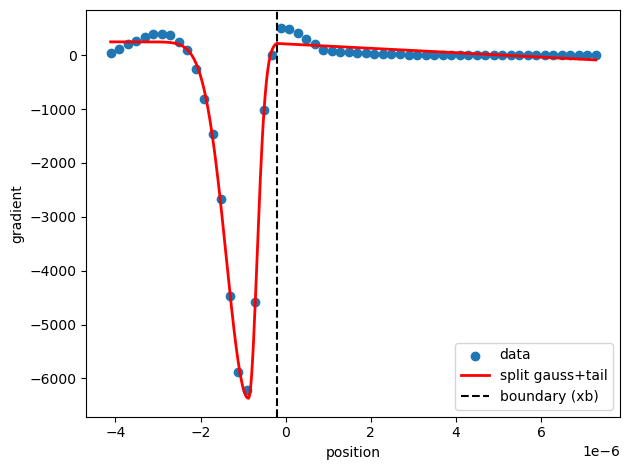

Fitting timestep 4, time = 9.375e-07
A=-1.719e+04, mu=-9.173e-07, sigma_l=7.995e-07, sigma_r=3.522e-07, xb=7.286e-06, m=-2.018e+06, C=-1.505e+02


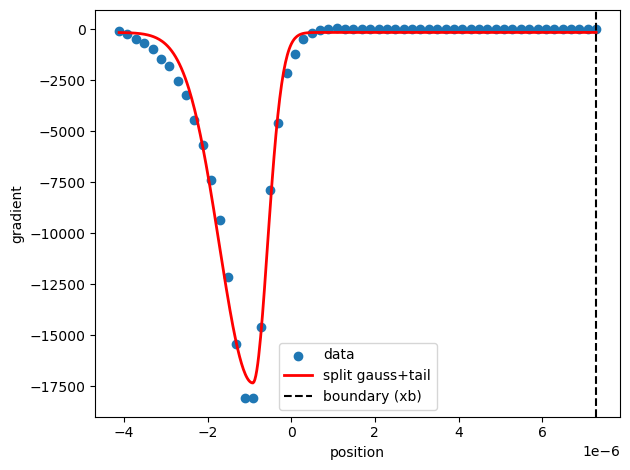

Fitting timestep 5, time = 1.125e-06
A=-6.672e+04, mu=-9.224e-07, sigma_l=8.537e-07, sigma_r=3.852e-07, xb=7.288e-06, m=5.945e+05, C=-8.260e+02


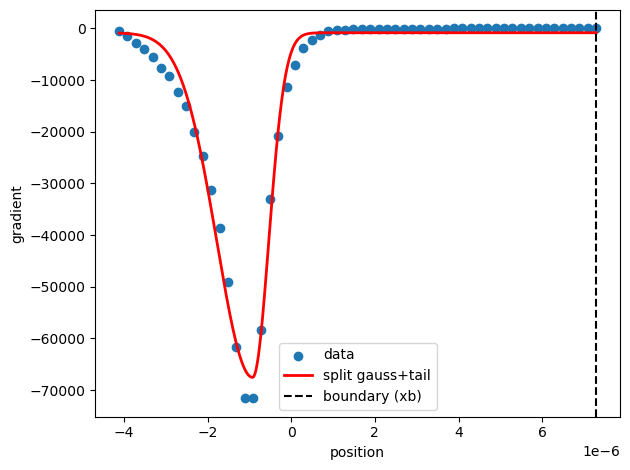

Fitting timestep 6, time = 1.312e-06
A=-2.055e+05, mu=-9.266e-07, sigma_l=8.805e-07, sigma_r=4.039e-07, xb=7.288e-06, m=-8.296e+02, C=-2.725e+03


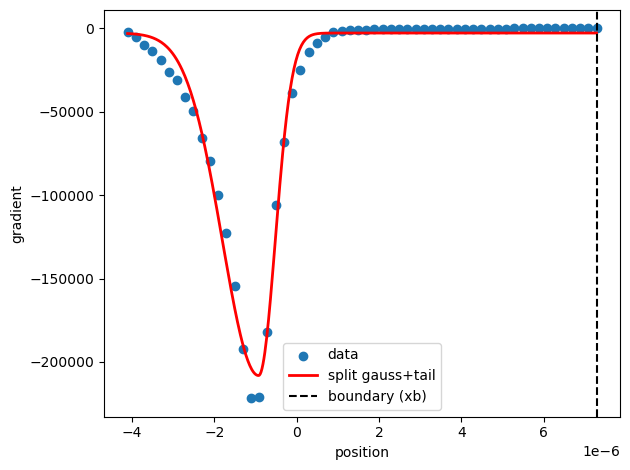

Fitting timestep 7, time = 1.500e-06
A=-7.496e+05, mu=-9.138e-07, sigma_l=8.573e-07, sigma_r=3.802e-07, xb=2.015e-06, m=3.120e+05, C=-1.833e+04


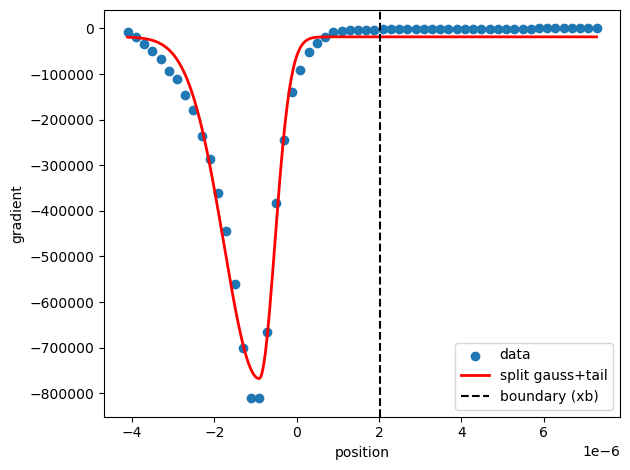

Fitting timestep 8, time = 1.687e-06
A=-1.546e+06, mu=-9.319e-07, sigma_l=9.167e-07, sigma_r=4.274e-07, xb=4.670e-06, m=8.278e+02, C=-4.513e+04


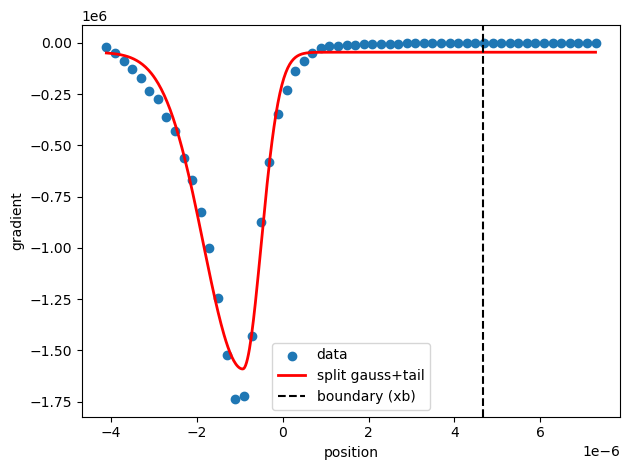

Fitting timestep 9, time = 1.875e-06
A=-1.915e+06, mu=-9.427e-07, sigma_l=1.026e-06, sigma_r=4.955e-07, xb=2.928e-06, m=3.935e+03, C=-6.988e+04


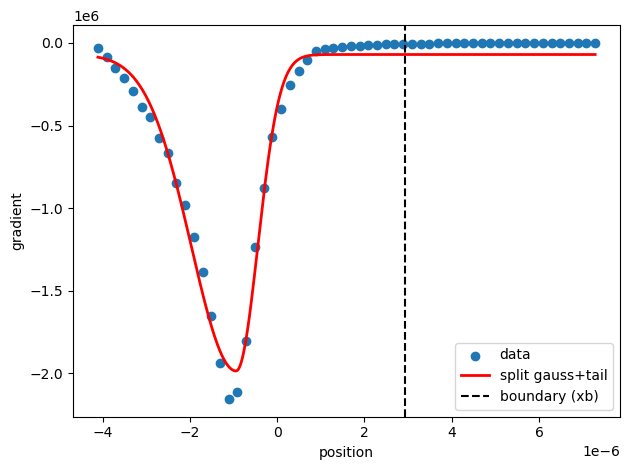

Fitting timestep 10, time = 2.063e-06
A=-1.963e+06, mu=-9.775e-07, sigma_l=1.158e-06, sigma_r=6.225e-07, xb=2.789e-06, m=6.393e+08, C=-3.286e+04


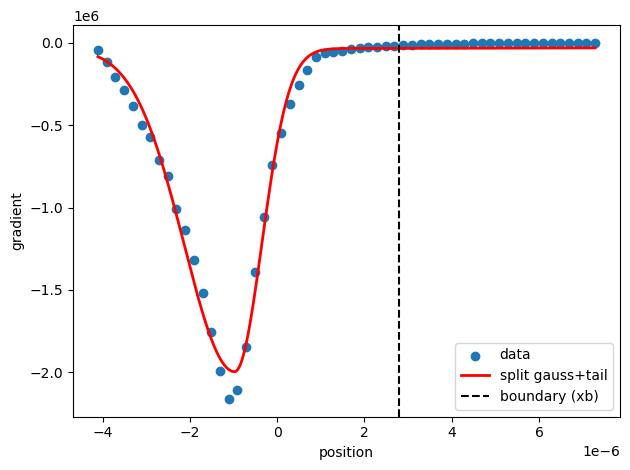

Fitting timestep 11, time = 2.250e-06
A=-1.813e+06, mu=-1.006e-06, sigma_l=1.245e-06, sigma_r=7.381e-07, xb=2.841e-06, m=1.300e+09, C=-3.172e+04


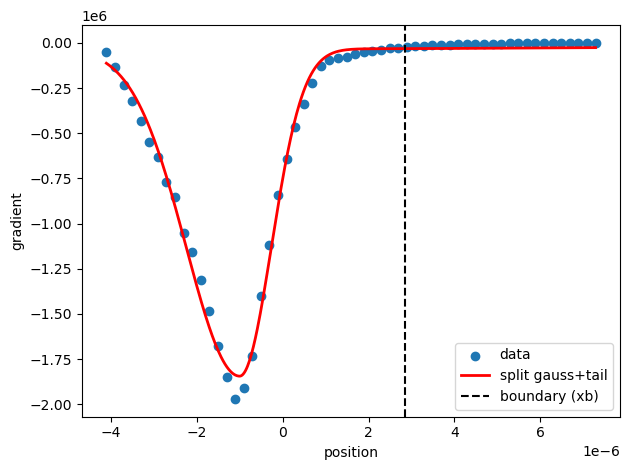

Fitting timestep 12, time = 2.437e-06
A=-1.661e+06, mu=-1.014e-06, sigma_l=1.297e-06, sigma_r=8.237e-07, xb=3.521e-06, m=2.401e+09, C=-3.632e+04


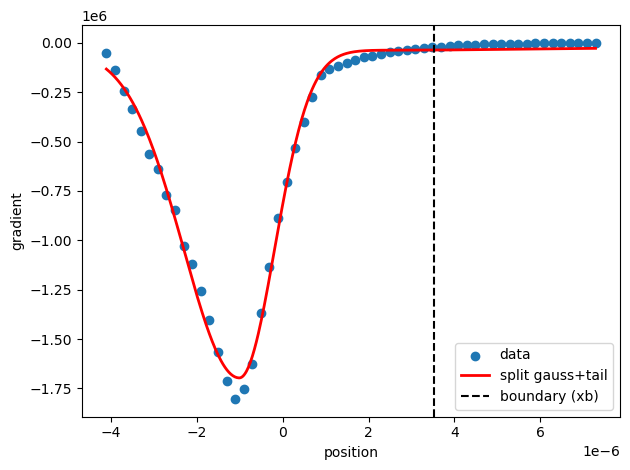

Fitting timestep 13, time = 2.625e-06
A=-1.542e+06, mu=-1.010e-06, sigma_l=1.311e-06, sigma_r=8.756e-07, xb=3.107e-06, m=3.989e+09, C=-5.079e+04


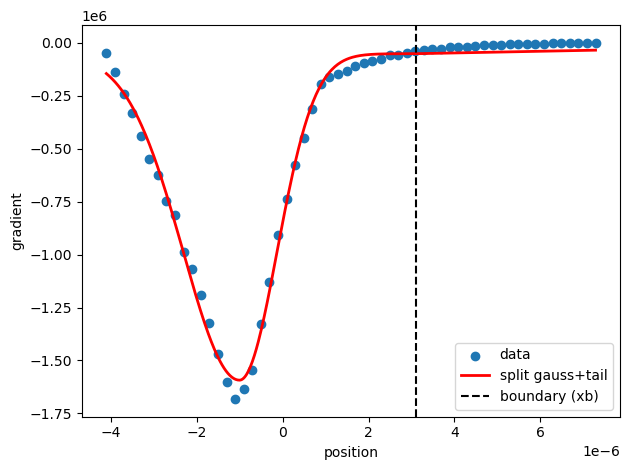

Fitting timestep 14, time = 2.813e-06
A=-1.455e+06, mu=-1.007e-06, sigma_l=1.307e-06, sigma_r=9.206e-07, xb=2.452e-06, m=6.066e+09, C=-5.963e+04


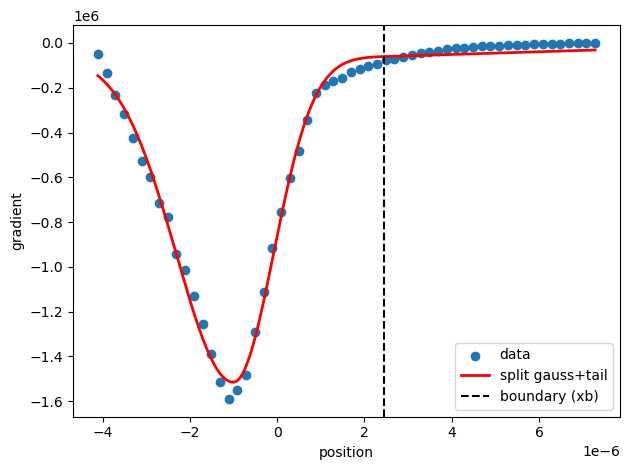

Fitting timestep 15, time = 3.000e-06
A=-1.360e+06, mu=-9.994e-07, sigma_l=1.301e-06, sigma_r=9.536e-07, xb=2.691e-06, m=8.586e+09, C=-7.303e+04


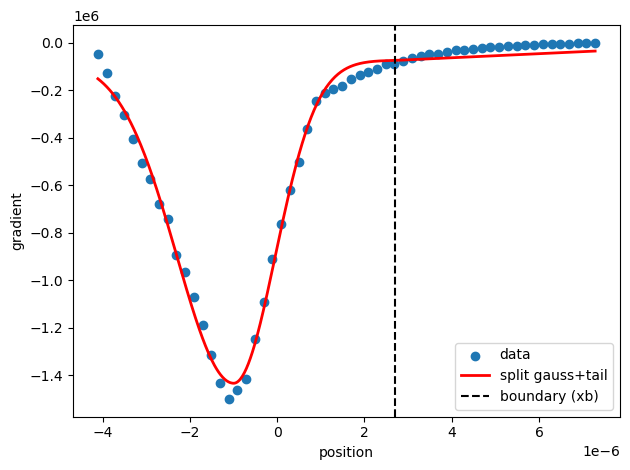

Fitting timestep 16, time = 3.187e-06
A=-1.291e+06, mu=-9.958e-07, sigma_l=1.287e-06, sigma_r=9.823e-07, xb=2.743e-06, m=1.146e+10, C=-8.144e+04


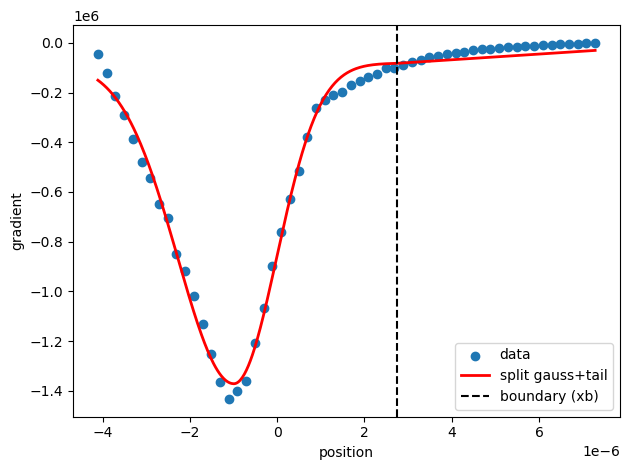

Fitting timestep 17, time = 3.375e-06
A=-1.218e+06, mu=-9.915e-07, sigma_l=1.269e-06, sigma_r=1.004e-06, xb=2.631e-06, m=1.460e+10, C=-9.310e+04


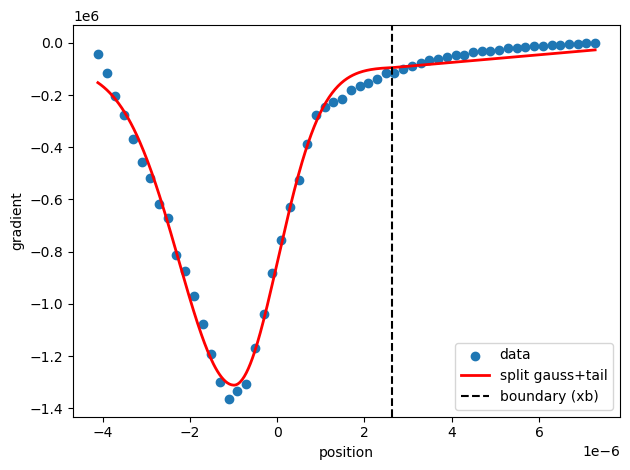

Fitting timestep 18, time = 3.563e-06
A=-1.159e+06, mu=-9.881e-07, sigma_l=1.252e-06, sigma_r=1.020e-06, xb=2.072e-06, m=1.781e+10, C=-1.018e+05


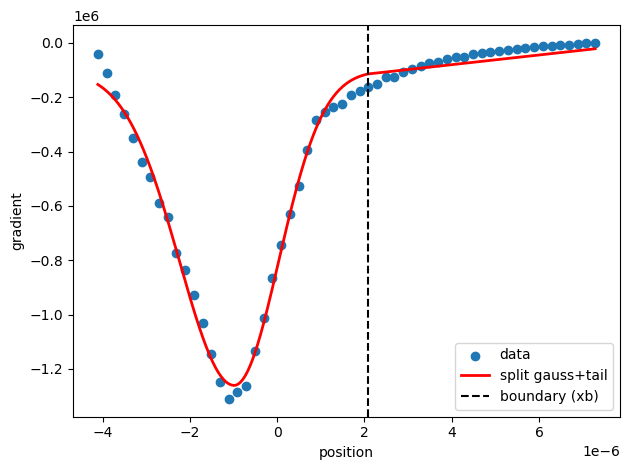

Fitting timestep 19, time = 3.750e-06
A=-1.106e+06, mu=-9.895e-07, sigma_l=1.233e-06, sigma_r=1.040e-06, xb=2.295e-06, m=2.105e+10, C=-1.081e+05


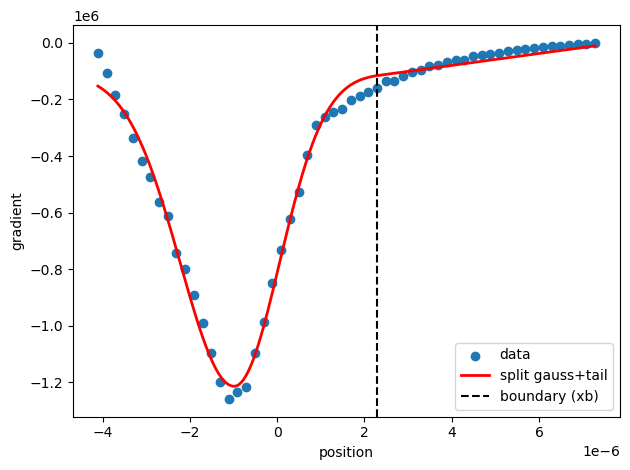

Fitting timestep 20, time = 3.937e-06
A=-1.131e+06, mu=-9.435e-07, sigma_l=1.366e-06, sigma_r=1.082e-06, xb=1.137e-06, m=3.907e+10, C=-2.853e+04


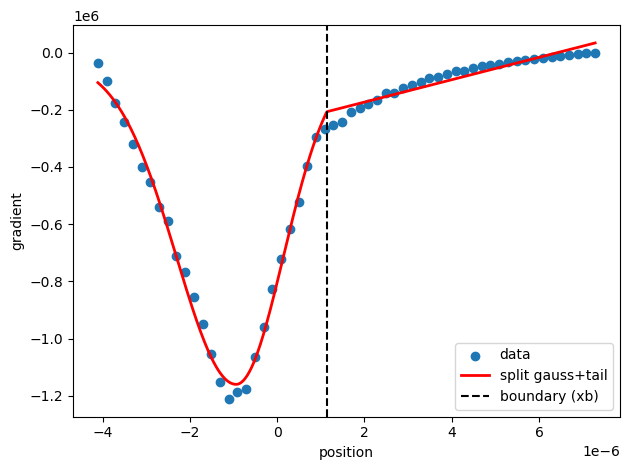

Fitting timestep 21, time = 4.125e-06
A=-1.090e+06, mu=-9.369e-07, sigma_l=1.372e-06, sigma_r=1.101e-06, xb=1.123e-06, m=3.998e+10, C=-2.530e+04


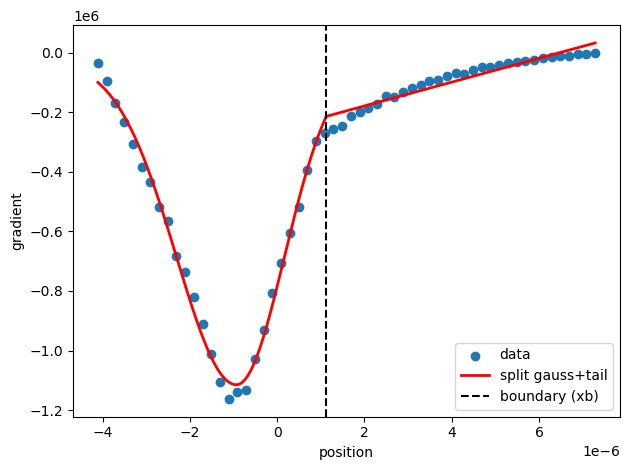

Fitting timestep 22, time = 4.312e-06
A=-1.053e+06, mu=-9.340e-07, sigma_l=1.367e-06, sigma_r=1.111e-06, xb=1.111e-06, m=4.059e+10, C=-2.640e+04


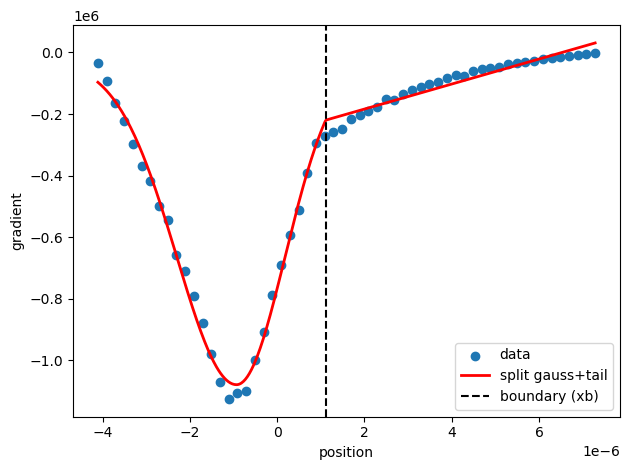

Fitting timestep 23, time = 4.500e-06
A=-1.016e+06, mu=-9.283e-07, sigma_l=1.374e-06, sigma_r=1.127e-06, xb=1.100e-06, m=4.094e+10, C=-2.274e+04


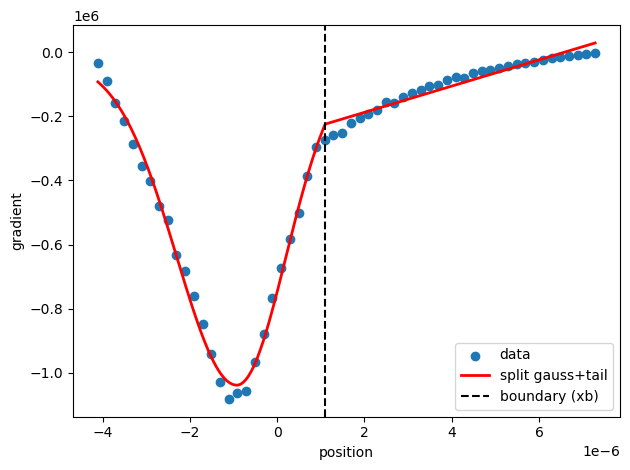

Fitting timestep 24, time = 4.687e-06
A=-1.003e+06, mu=-9.058e-07, sigma_l=1.407e-06, sigma_r=1.115e-06, xb=1.013e-06, m=4.235e+10, C=-7.178e+03


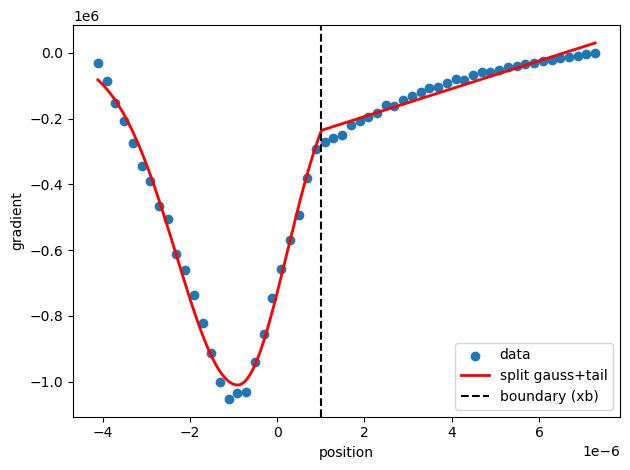

Fitting timestep 25, time = 4.875e-06
A=-9.738e+05, mu=-9.055e-07, sigma_l=1.401e-06, sigma_r=1.120e-06, xb=1.003e-06, m=4.223e+10, C=-8.947e+03


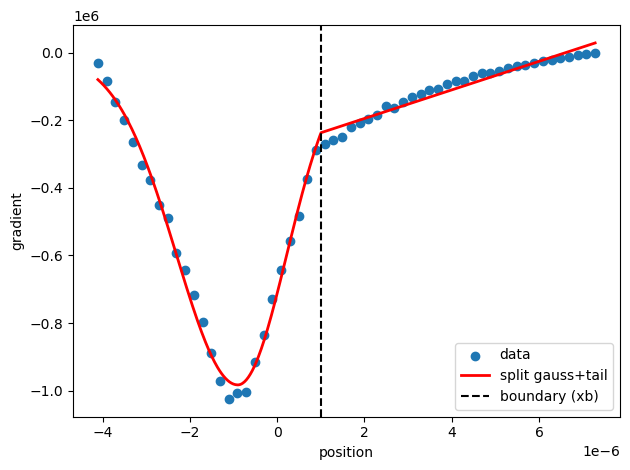

Fitting timestep 26, time = 5.063e-06
A=-9.401e+05, mu=-8.922e-07, sigma_l=1.434e-06, sigma_r=1.141e-06, xb=9.959e-07, m=4.197e+10, C=1.510e+03


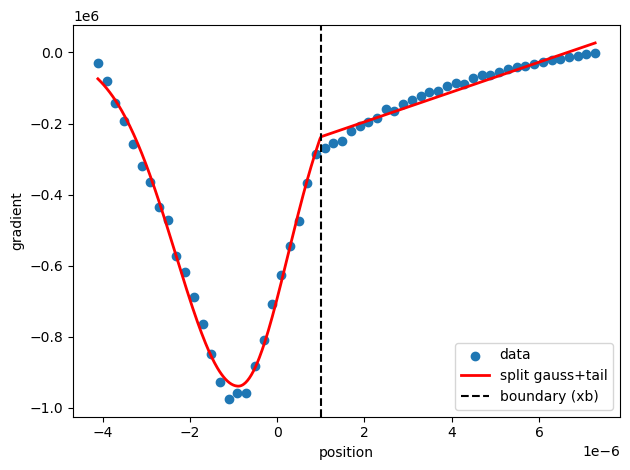

Fitting timestep 27, time = 5.250e-06
A=-9.101e+05, mu=-8.946e-07, sigma_l=1.416e-06, sigma_r=1.140e-06, xb=9.881e-07, m=4.160e+10, C=-4.295e+03


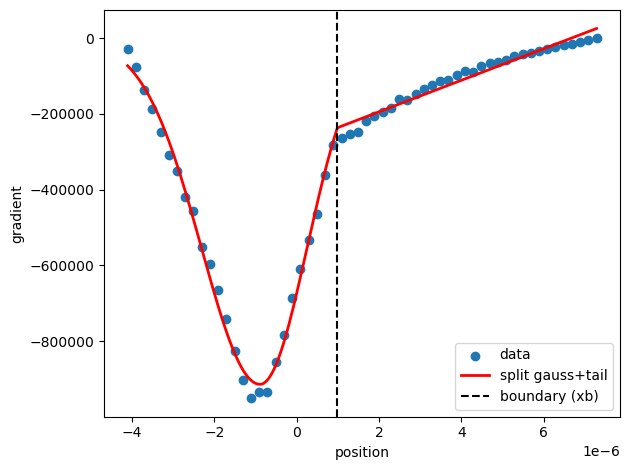

Fitting timestep 28, time = 5.438e-06
A=-8.787e+05, mu=-8.839e-07, sigma_l=1.441e-06, sigma_r=1.156e-06, xb=9.823e-07, m=4.113e+10, C=2.894e+03


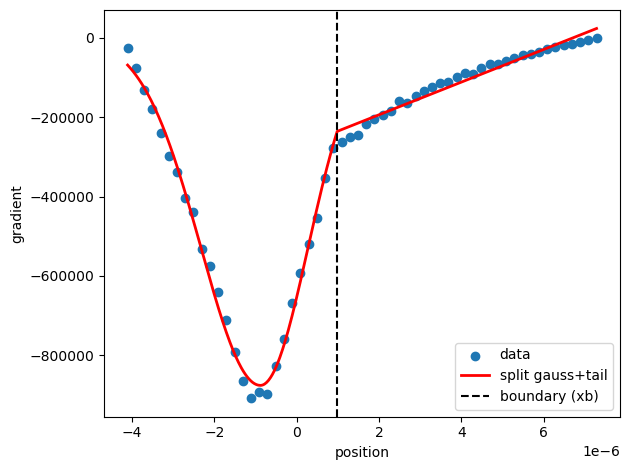

Fitting timestep 29, time = 5.625e-06
A=-8.476e+05, mu=-8.791e-07, sigma_l=1.444e-06, sigma_r=1.163e-06, xb=9.766e-07, m=4.057e+10, C=3.381e+03


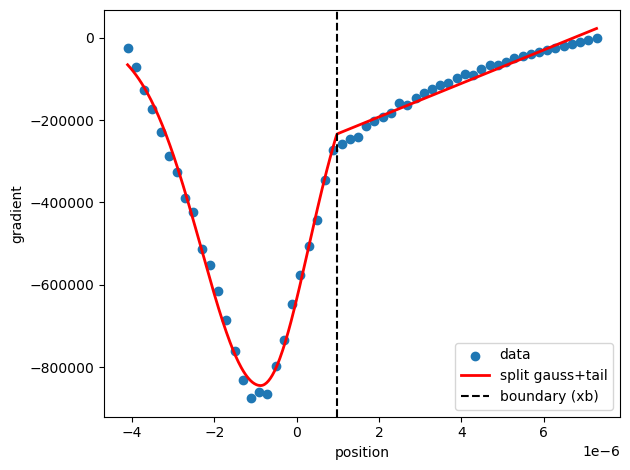

Fitting timestep 30, time = 5.812e-06
A=-8.190e+05, mu=-8.785e-07, sigma_l=1.439e-06, sigma_r=1.166e-06, xb=9.703e-07, m=3.994e+10, C=1.545e+03


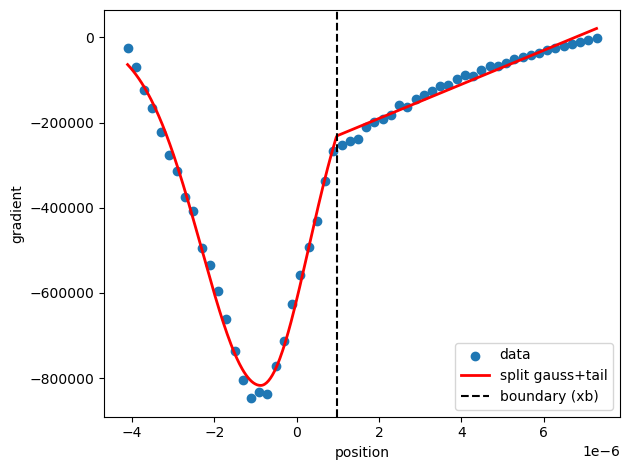

Fitting timestep 31, time = 6.000e-06
A=-7.857e+05, mu=-8.508e-07, sigma_l=1.504e-06, sigma_r=1.195e-06, xb=9.683e-07, m=3.925e+10, C=1.808e+04


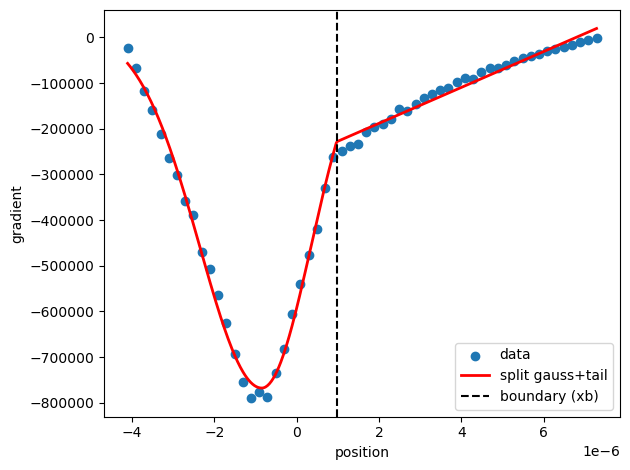

Fitting timestep 32, time = 6.188e-06
A=-7.537e+05, mu=-8.585e-07, sigma_l=1.468e-06, sigma_r=1.188e-06, xb=9.625e-07, m=3.850e+10, C=7.752e+03


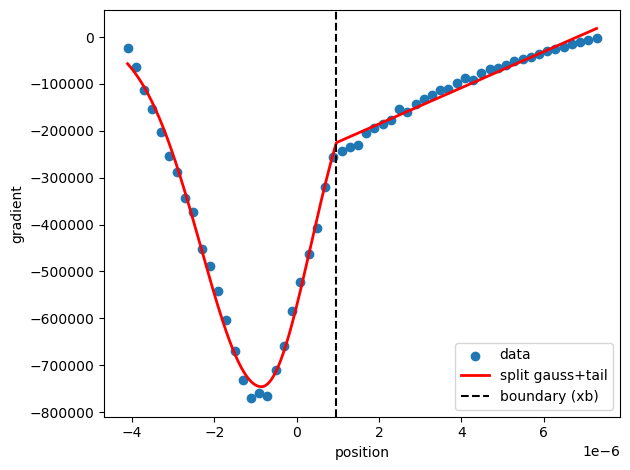

Fitting timestep 33, time = 6.375e-06
A=-7.283e+05, mu=-8.648e-07, sigma_l=1.448e-06, sigma_r=1.186e-06, xb=9.554e-07, m=3.770e+10, C=2.834e+03


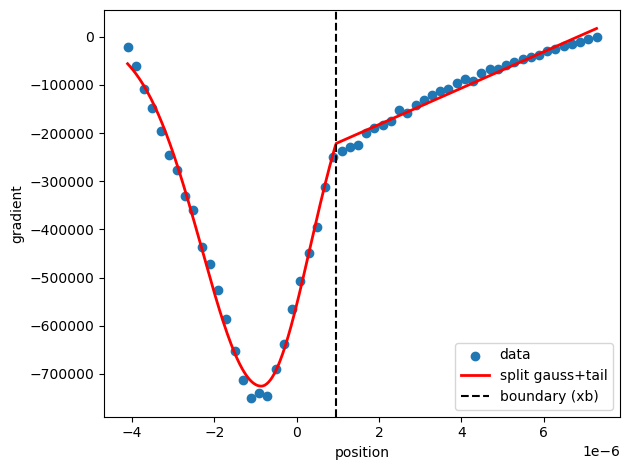

Fitting timestep 34, time = 6.563e-06
A=-7.005e+05, mu=-8.443e-07, sigma_l=1.497e-06, sigma_r=1.207e-06, xb=9.530e-07, m=3.687e+10, C=1.375e+04


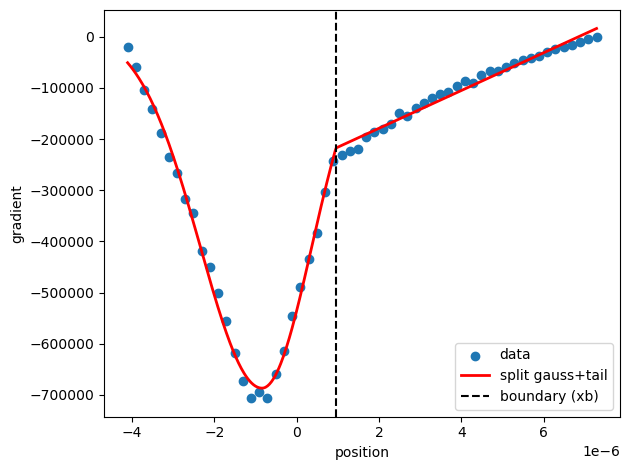

Fitting timestep 35, time = 6.750e-06
A=-6.704e+05, mu=-8.299e-07, sigma_l=1.521e-06, sigma_r=1.219e-06, xb=9.504e-07, m=3.600e+10, C=1.765e+04


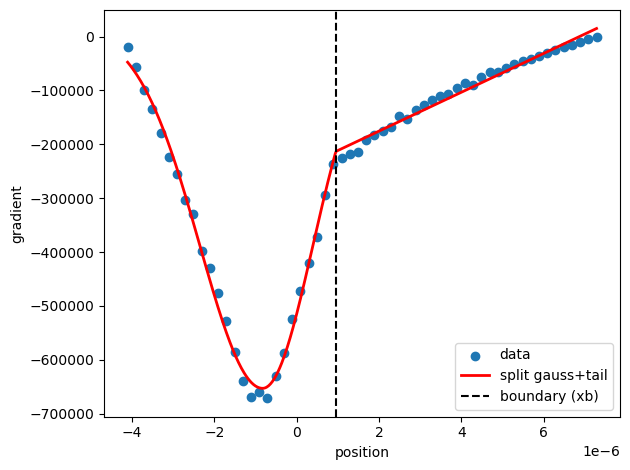

Fitting timestep 36, time = 6.938e-06
A=-6.414e+05, mu=-8.285e-07, sigma_l=1.512e-06, sigma_r=1.222e-06, xb=9.461e-07, m=3.510e+10, C=1.462e+04


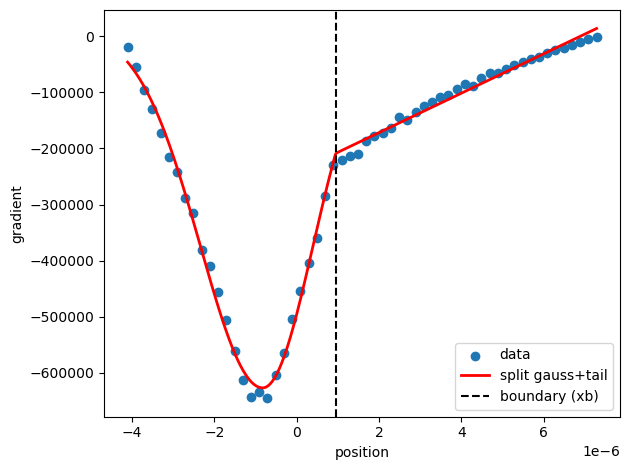

Fitting timestep 37, time = 7.125e-06
A=-6.129e+05, mu=-7.960e-07, sigma_l=1.579e-06, sigma_r=1.245e-06, xb=9.446e-07, m=3.417e+10, C=2.671e+04


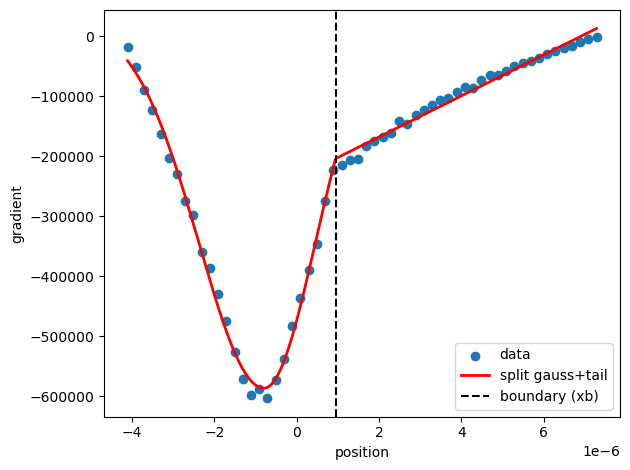

Fitting timestep 38, time = 7.312e-06
A=-5.815e+05, mu=-7.723e-07, sigma_l=1.615e-06, sigma_r=1.258e-06, xb=9.423e-07, m=3.321e+10, C=3.082e+04


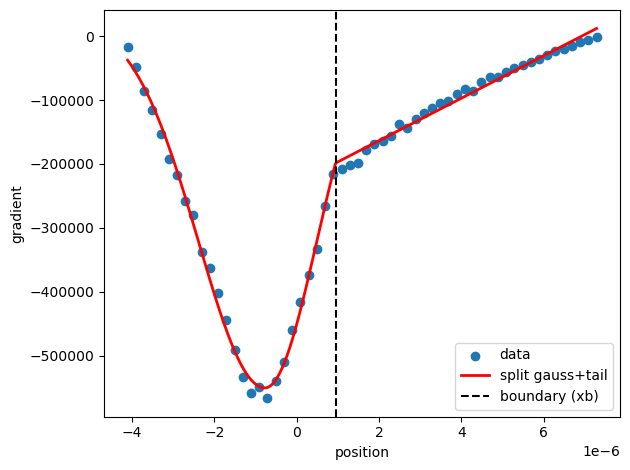

Fitting timestep 39, time = 7.500e-06
A=-5.502e+05, mu=-7.653e-07, sigma_l=1.610e-06, sigma_r=1.262e-06, xb=9.385e-07, m=3.222e+10, C=2.757e+04


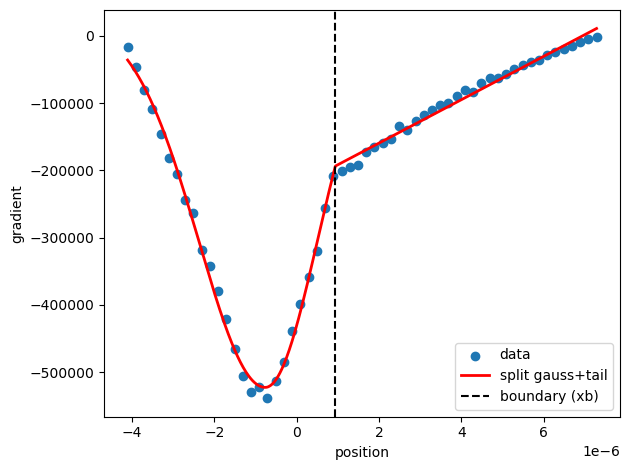

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 1. load data and extract a single profile
df = pd.read_csv('outputs/sweep_test/fwhm_1.30e-5_k_3.68_width_1.90e-6/radial_gradient.csv')  # replace <run_name>
for n in range(len(times)):
    positions = df.columns.values[1:].astype(float)
    grad0 = df.iloc[n, 1:].values.astype(float)

    times = df.iloc[:, 0].astype(float)
    print(f"Fitting timestep {n}, time = {times[n]:.3e}")

    # 2. define piecewise: asymmetric Gaussian up to boundary xb, then linear tail
    def split_gauss_linear_tail(x, A, mu, sigma_l, sigma_r, xb, m, C):
        """
        Gaussian for x <= xb (with sigma_l left of mu, sigma_r right of mu),
        then linear decay y = m*x + b for x > xb, with continuity at xb.
        """
        # Gaussian core
        y_gauss = np.empty_like(x)
        left_mask = x <= mu
        right_mask = x > mu
        y_gauss[left_mask]  = C + A * np.exp(-0.5*((x[left_mask] - mu)/sigma_l)**2)
        y_gauss[right_mask] = C + A * np.exp(-0.5*((x[right_mask] - mu)/sigma_r)**2)

        # continuity: compute Gaussian at xb
        sigma_xb = sigma_r if xb > mu else sigma_l
        G_xb = C + A * np.exp(-0.5*((xb - mu)/sigma_xb)**2)
        b = G_xb - m * xb

        # piecewise output
        y = np.where(x <= xb, y_gauss, m * x + b)
        return y

    # 3. initial guesses for a negative peak (dip)
    A0     = grad0.min() - grad0.max()            # negative amplitude
    mu0    = positions[np.argmin(grad0)]          # center at dip location
    sigma0 = 0.2 * (positions.max() - positions.min())
    # estimate slope from last two points for tail
    m0     = (grad0[-1] - grad0[-2]) / (positions[-1] - positions[-2])
    # boundary guess around where gradient transitions
    xb0    = np.clip(mu0 + sigma0, positions.min(), positions.max())
    C0     = grad0.max()                          # baseline at highest value
    p0 = (A0, mu0, sigma0, sigma0, xb0, m0, C0)

    # 4. bounds: ensure lower < upper for all parameters
    lower = [  -np.inf,
            positions.min(),
            1e-12,
            1e-12,
            positions.min(),  # xb lower bound
            -np.inf,
            -np.inf ]
    upper = [   np.inf,
            positions.max(),
            np.inf,
            np.inf,
            positions.max(),  # xb upper bound
            np.inf,
            np.inf ]

    # 5. fit
    popt, pcov = curve_fit(
        split_gauss_linear_tail,
        positions,
        grad0,
        p0=p0,
        bounds=(lower, upper),
        maxfev=20000
    )
    A, mu, sigma_l, sigma_r, xb, m, C = popt
    print(f"A={A:.3e}, mu={mu:.3e}, sigma_l={sigma_l:.3e}, sigma_r={sigma_r:.3e}, xb={xb:.3e}, m={m:.3e}, C={C:.3e}")

    # 6. plot data + fit
    x_fit = np.linspace(positions.min(), positions.max(), 500)
    y_fit = split_gauss_linear_tail(x_fit, *popt)

    plt.scatter(positions, grad0, label='data')
    plt.plot(x_fit, y_fit, 'r-', linewidth=2, label='split gauss+tail')
    plt.axvline(xb, color='k', linestyle='--', label='boundary (xb)')
    plt.xlabel('position')
    plt.ylabel('gradient')
    plt.legend()
    plt.tight_layout()
    plt.show()
